# _Foundations of Applied Mathematics_ Labs: Volume 1

In [1]:
%matplotlib inline

# 1. Linear Transformations

In [2]:
import numpy as np
from matplotlib import pyplot as plt

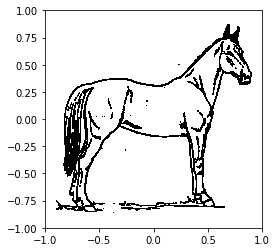

In [3]:
# Load the array from the .npy file.
data = np.load("data/horse.npy")

# Plot the x row against the y row with black pixels.
plt.plot(data[0], data[1], 'k,')

# Set the window limits to [-1, 1] by [-1, 1] and make the window square.
plt.axis([-1, 1, -1, 1])
plt.gca().set_aspect("equal")
plt.show()

**Problem 1.** Write a function for each type of linear transformation (_stretch_, _shear_, _reflection_, _rotation_, _composition_). Each function should accept an array to transform and the scalars that define the transformation ($a$ and $b$ for stretch, shear, and reflection, and $θ$ for rotation). Construct the matrix representation, left multiply it with the input array, and return the transformed array.

To test these functions, write a function to plot the original points in `horse.npy` together with the transformed points in subplots for a side-by-side comparison. Compare your results to Figure 1.1.

In [4]:
def stretch(data, a, b=None):
    """Linear Transformation: Stretch
    Compute the stretched version of an image, with matrix [[a, 0], [0, b]]
    If a=b, then it is a dilation
    """
    if b is None:
        b = a
    X = np.array([[a, 0], [0, b]])
    result = X.dot(data)
    return(result)

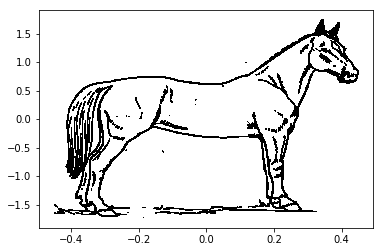

In [5]:
data2 = stretch(data, 0.5, 2)

# Plot the x row against the y row with black pixels.
plt.plot(data2[0], data2[1], 'k,')

## Set the window limits to [-1, 1] by [-1, 1] and make the window square.
#plt.axis([-2, 2, -2, 2])
#plt.gca().set_aspect("equal")
plt.show()

In [6]:
def shear(data, a, horizontal=True):
    """Linear Transformation: Shear
    Slants the vector by a scalar factor horizontally (x-axis) or vertically (y-axis). 
    """
    if horizontal:
        X = np.array([[1, a], [0, 1]])
    else:
        X = np.array([[1, 0], [a, 1]])
    result = X.dot(data)
    return(result)

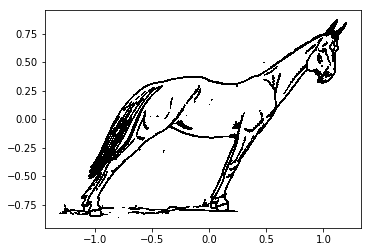

In [7]:
data2 = shear(data, 0.5, horizontal=True)

# Plot the x row against the y row with black pixels.
plt.plot(data2[0], data2[1], 'k,')

plt.gca().set_aspect("equal")
plt.show()

In [8]:
def reflection(data, a, b):
    """Linear Transformation: Reflection
    Reflects the vector about a line that passes through the origin
    """
    X = np.array([[a**2 - b**2, 2*a*b], [2*a*b, b**2 - a**2]])/(a**2 + b**2)
    result = X.dot(data)
    return(result)

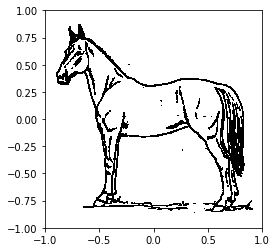

In [9]:
data2 = reflection(data, 0, 1)

# Plot the x row against the y row with black pixels.
plt.plot(data2[0], data2[1], 'k,')

# Set the window limits to [-1, 1] by [-1, 1] and make the window square.
plt.axis([-1, 1, -1, 1])
plt.gca().set_aspect("equal")
plt.show()

In [10]:
from math import pi, cos, sin

In [11]:
def rotation(data, theta):
    """Linear Transformation: Rotation
    Rotates the vector about a line that passes through the origin
    """
    X = np.array([[cos(theta), -sin(theta)], [sin(theta), cos(theta)]])
    result = X.dot(data)
    return(result)

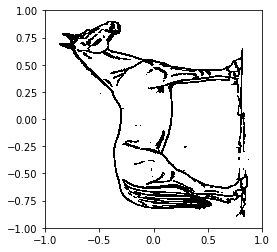

In [12]:
data2 = rotation(data, pi/2)

# Plot the x row against the y row with black pixels.
plt.plot(data2[0], data2[1], 'k,')
# Set the window limits to [-1, 1] by [-1, 1] and make the window square.
plt.axis([-1, 1, -1, 1])
plt.gca().set_aspect("equal")
plt.show()

### Object oriented class for transformations

The following class `LinearTransform` is an object oriented class for doing linear transformations. It works pretty well now but could be better, including adding error checking and tests.

In [71]:
class LinearTransform(object):
    def __init__(self, filename): 
        self.data = np.load(filename)
        self.Y = self.data
    
    def reset(self):
        self.Y = self.data
        return(self)
    
    def stretch(self, a, b=None):
        """Linear Transformation: Stretch
        Compute the stretched version of an image, with matrix [[a, 0], [0, b]]
        If a=b, then it is a dilation
        """
        if b is None:
            b = a
        X = np.array([[a, 0], [0, b]])
        self.Y = X.dot(self.Y)
        return(self)
         
    def shear(self, a, horizontal=True):
        """Linear Transformation: Shear
        Slants the vector by a scalar factor horizontally (x-axis) or vertically (y-axis). 
        """
        if horizontal:
            X = np.array([[1, a], [0, 1]])
        else:
            X = np.array([[1, 0], [a, 1]])
        self.Y = X.dot(self.Y)
        return(self)

    def reflection(self, a, b):
        """Linear Transformation: Reflection
        Reflects the vector about a line that passes through the origin
        """
        X = np.array([[a**2 - b**2, 2*a*b], [2*a*b, b**2 - a**2]])/(a**2 + b**2)
        self.Y = X.dot(self.Y)
        return(self)

    def rotation(self, theta):
        """Linear Transformation: Rotation
        Rotates the vector about a line that passes through the origin
        """
        X = np.array([[cos(theta), -sin(theta)], [sin(theta), cos(theta)]])
        self.Y = X.dot(self.Y)
        return(self)
        
    def plot(self, aspect=None):
        plt.plot(self.Y[0], self.Y[1], 'k,')
        if aspect:
            plt.gca().set_aspect(aspect)
        plt.show()
#        self.reset()

In [65]:
LT = LinearTransform("data/horse.npy")

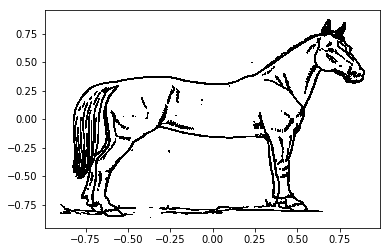

In [66]:
LT.plot()

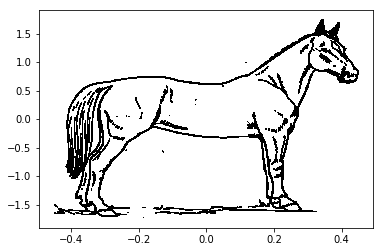

In [67]:
LT.reset().stretch(0.5, 2).plot()

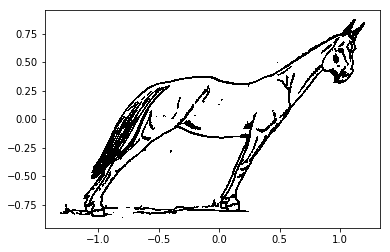

In [68]:
LT.reset().shear(0.5, horizontal=True).plot()

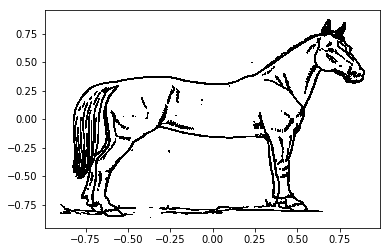

In [70]:
LT.reset().reflection(0, 1).plot()

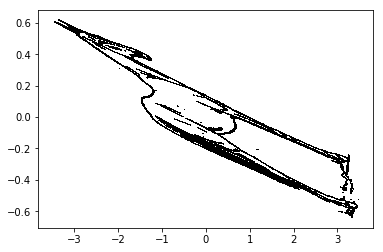

In [53]:
LT.reset().rotation(pi/2).plot()

**Problem 2.** The moon orbits the earth while the earth orbits the sun. Assuming circular orbits, we can compute the trajectories of both the earth and the moon using only linear and affine transformations.

Assume an orientation where both the earth and moon travel counterclockwise, with the sun at the origin. Let $\mathbf{p}_e(t)$ and $\mathbf{p}_m(t)$ be the positions of the earth and the moon at time $t$, respectively, and let $ω_e$ and $ω_m$ be each celestial body’s angular momentum. For a particular time $t$, we calculate $\mathbf{p}_e(t)$ and $\mathbf{p}_m(t)$ with the following steps:

1. Compute $\mathbf{p}_e(t)$ by rotating the initial vector $\mathbf{p}_e(0)$ counterclockwise about the origin by $tω_e$ radians.

2. Calculate the position of the moon relative to the earth at time $t$ by rotating the vector $\mathbf{p}_m(0) − \mathbf{p}_e(0)$ counterclockwise about the origin by $tω_m$ radians.

3. To compute $\mathbf{p}_m(t)$, translate the vector resulting from the previous step by $p_e(t)$.

Write a function that accepts a final time $T$ and the angular momenta $ω_e$ and $ω_m$. Assuming initial positions $\mathbf{p}_e(0) = (10, 0)$ and $\mathbf{p}_m(0) = (11, 0)$, plot $\mathbf{p}_e(t)$ and $\mathbf{p}_m(t)$ over the time interval $t ∈ [0, T]$.

The moon travels around the earth approximately 13 times every year. With $T = 3π/2$, $ω_e = 1$, and $ω_m = 13$, your plot should resemble the following figure (fix the aspect ratio with `ax.set_aspect("equal")`).

### Timing Code

The following code is useful for measuring how long it takes for code to run:

In [5]:
import time

def for_loop():
    """Go through ten million iterations of nothing."""
    for _ in range(int(1e7)):
        pass

def time_for_loop():
    """Time for_loop() with time.time()."""
    start = time.time()             # Clock the starting time.
    for_loop()
    return time.time() - start      # Return the elapsed time.

time_for_loop()

0.2889101505279541

The `%timeit` command is used in iPython for timing a single line of code.

In [6]:
%timeit for_loop()

290 ms ± 10 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Timing an Algorithm

In [7]:
from random import random

def random_vector(n):       # Equivalent to np.random.random(n).tolist()
    """Generate a random vector of length n as a list."""
    return [random() for i in range(n)]

def random_matrix(n):       # Equivalent to np.random.random((n,n)).tolist()
    """Generate a random nxn matrix as a list of lists."""
    return [[random() for j in range(n)] for i in range(n)]

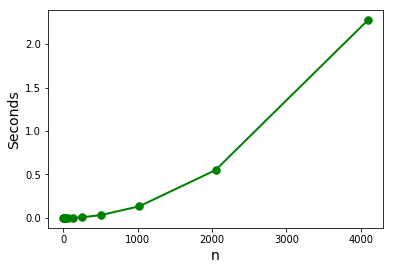

In [8]:
domain = 2**np.arange(1,13)
times = []
for n in domain:
    start = time.time()
    random_matrix(n)
    times.append(time.time() - start)

plt.plot(domain, times, 'g.-', linewidth=2, markersize=15)
plt.xlabel("n", fontsize=14)
plt.ylabel("Seconds", fontsize=14)
plt.show()